In [1]:
from Core import *
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
Io().upload_image_of_url("https://cdn.vox-cdn.com/thumbor/T1bCicje7iVTDLq6kk_ST78FfmY=/0x0:3000x2000/1200x0/filters:focal(0x0:3000x2000):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/24106924/119941191_774792496631376_702700738735193120_n_copy_cropped.jpg")

In [2]:
x = Io().read_image_from_folder()

In [106]:
x

array([[[  4,  59,  96],
        [  4,  59,  96],
        [  5,  60,  97],
        ...,
        [119,  82,  86],
        [ 18,   7,  10],
        [ 28,  30,  31]],

       [[  4,  59,  96],
        [  4,  59,  96],
        [  5,  60,  97],
        ...,
        [121,  84,  88],
        [ 23,  10,  12],
        [ 24,  26,  27]],

       [[  4,  59,  96],
        [  4,  59,  96],
        [  5,  60,  97],
        ...,
        [129,  92,  96],
        [ 31,  18,  20],
        [ 19,  19,  19]],

       ...,

       [[ 29, 133,  98],
        [ 29, 133,  98],
        [ 31, 133,  98],
        ...,
        [149, 105,  68],
        [148, 103,  69],
        [146, 102,  65]],

       [[ 30, 132,  97],
        [ 30, 132,  97],
        [ 30, 132,  97],
        ...,
        [148, 106,  71],
        [146, 103,  70],
        [144, 102,  67]],

       [[ 30, 132,  97],
        [ 30, 132,  97],
        [ 30, 132,  97],
        ...,
        [147, 104,  71],
        [145, 102,  69],
        [142,  99,  66]]

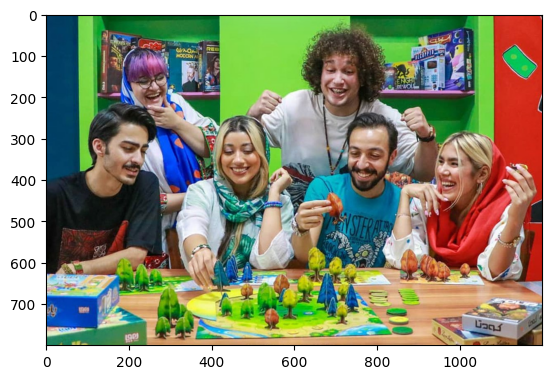

In [3]:
Display(x).show_image_plot()

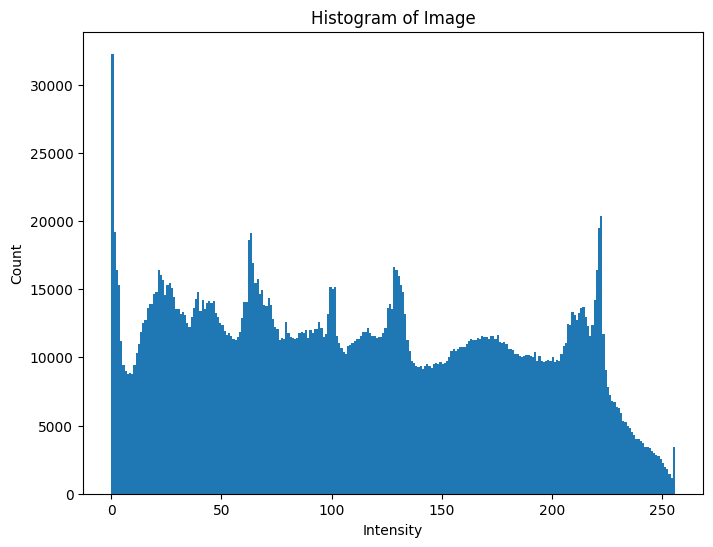

In [7]:

Report(x).display_hist_plt()

White noise

In [3]:
white = Noise(x).white(0.1)

In [108]:
(white > 255).sum()

0

In [109]:
white.size

2880000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


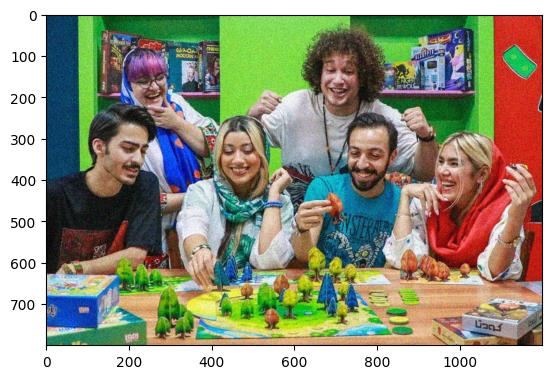

In [110]:
Display(white).show_image_plot()

Gaussian

In [4]:
y = Color(x).bgr_to_gray()

In [5]:

gauss = Noise(y).gaussian(0,0.5)

In [16]:
noise=np.random.normal(loc= 0, scale= 0.5**0.5, size=(y.shape)).astype('uint8')
gauss_image = y + y*noise
            
gauss = np.clip(gauss_image, 0, 255)

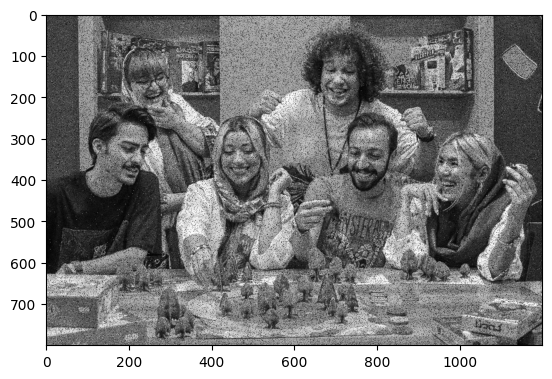

In [17]:
Display(gauss).show_image_plot('gray')

In [11]:
gauss = np.random.normal(0,1**0.5,y.size)
gauss = gauss.reshape(y.shape[0],y.shape[1]).astype('uint8')
g = gauss * y
# Add the Gaussian noise to the image
img_gauss = cv2.add(y,g)

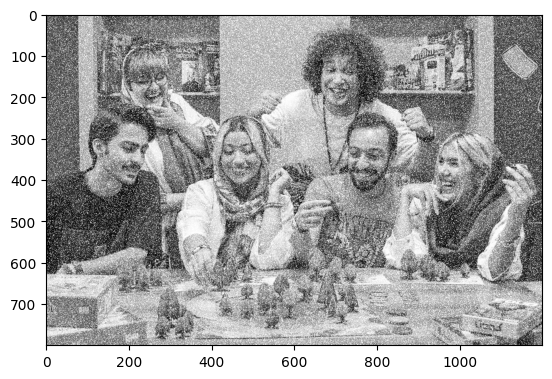

In [12]:
Display(img_gauss).show_image_plot('gray')
